In [27]:
#Importing csvs 
#breast cancer data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [28]:
## inline = code and visualization right after it 
%pylab inline
## parameters for size 
pylab.rcParams['figure.figsize'] = (14.0, 12.0)

Populating the interactive namespace from numpy and matplotlib


/Users/pankhurijain/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors', 'test', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [26]:
bc_data = pd.read_csv('bc_data.csv', low_memory=False)
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
# reset index to be the id
bc_data.set_index('id', inplace = True)

In [12]:
bc_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# what does the data look like? 
bc_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [14]:
# remove the unnecessary unnamed column
bc_data = bc_data.dropna(axis=1,how='all')

In [15]:
# verify unnamed column is no longer there
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [202]:
# verify no duplicates 
bc_data[bc_data.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,


In [16]:
# mapping the two types of diagnosis to 1 and 0 (true and false)
# diagnosis_data = bc_data.copy()
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})

In [17]:
# get the number of each type of diagnosis
m = bc_data[bc_data['diagnosis'] == 1]
# m.info()
b = bc_data[bc_data['diagnosis'] == 0]
b['diagnosis'].count()

357

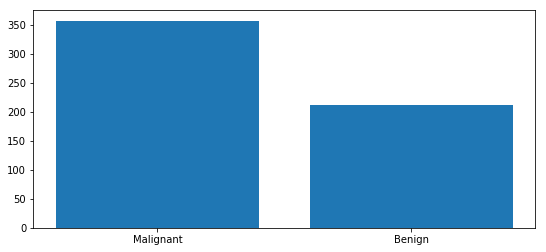

In [19]:
# plot the frequency of the 2 results
fig, axs = plt.subplots(1,1, figsize=(9, 4), sharey=True)
axs.bar(['Malignant', 'Benign'], [b['diagnosis'].count(), m['diagnosis'].count()]);
# based on the data collected, more often than not its M - caveats (only recruiting people who have more severe disease which is indicative of malignancy)

In [204]:
# find the correlations between the different types of means - can we simplify the model and use only some of these variables? 
mean = bc_data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
# look at the variance to see if specific values move together 
mean.cov()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-0.007754
texture_mean,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-0.002321
perimeter_mean,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-0.044859
area_mean,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-0.703426
smoothness_mean,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,0.000058
compactness_mean,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,0.000211
concavity_mean,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,0.000190
concave points_mean,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,0.000046
symmetry_mean,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,0.000093
fractal_dimension_mean,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,0.000050


In [205]:
mean.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


Findings from above 
Look at the correlation (between -1 and 1 for correlation)
# using the following scale 
# 0.00-0.19: very weak
# 0.20-0.39: weak
# 0.40-0.59: moderate 
# 0.60-0.79: strong
# 0.80-1.00: very strong.
# We can see that the radius, parameter and area are all strongly correlated. 
# To a less extent, concavity, compactness and concave points_mean are also strongly correlated 

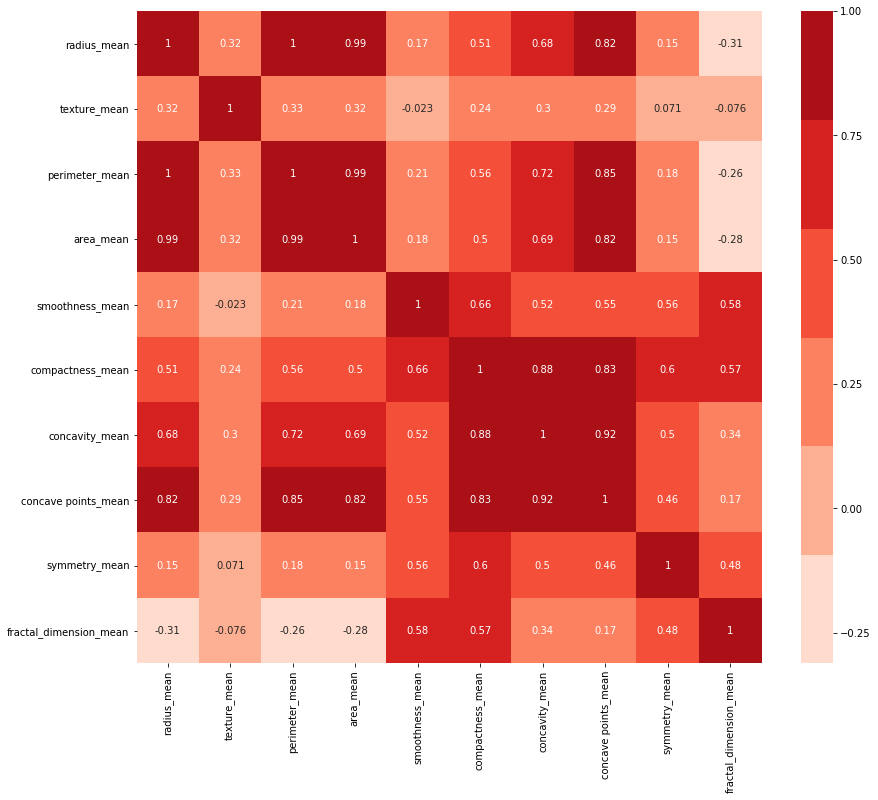

<Figure size 1008x864 with 0 Axes>

In [211]:
# validate the above with a heatmap visual (see the squares of beige corresponding to high correlation)
# high correlation is correlated with red 
import seaborn as sns
ax = sns.heatmap(mean.corr(), annot=True, cmap=sns.color_palette("Reds"))
plt.show()
my_dpi = 96
plt.savefig('c:\\Downloads\\BC Data Set\\heatmap_dpi.png',dpi=my_dpi*2)

In [179]:
# visualize the high correlation between 'radius_mean', 'perimeter_mean', 'area_mean'
firstMean = bc_data[['radius_mean', 'perimeter_mean', 'area_mean']]
firstMean.set_index(np.arange(0, bc_data['radius_mean'].count())).head()
firstMean.head()

,radius_mean,perimeter_mean,area_mean
id,,,
842302,17.99,122.80,1001.0
842517,20.57,132.90,1326.0
84300903,19.69,130.00,1203.0
84348301,11.42,77.58,386.1
84358402,20.29,135.10,1297.0


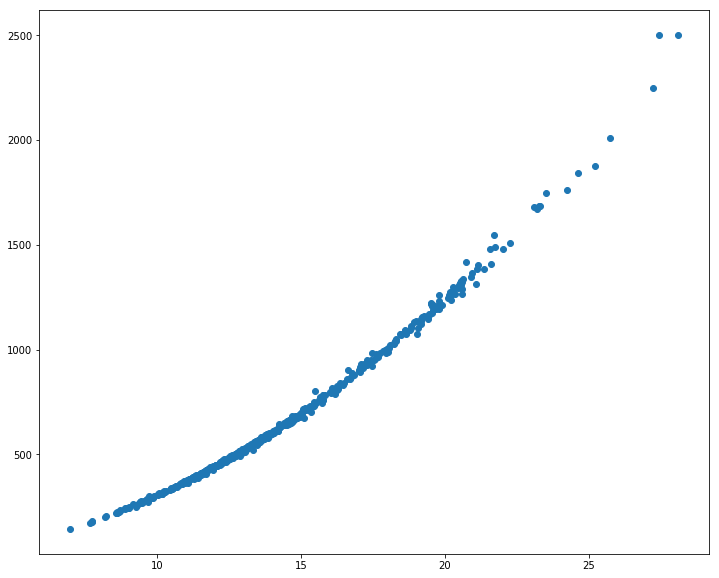

In [180]:
# 2D plot
scatter(firstMean['radius_mean'], firstMean['area_mean'])
# exponential (area=pir^2)

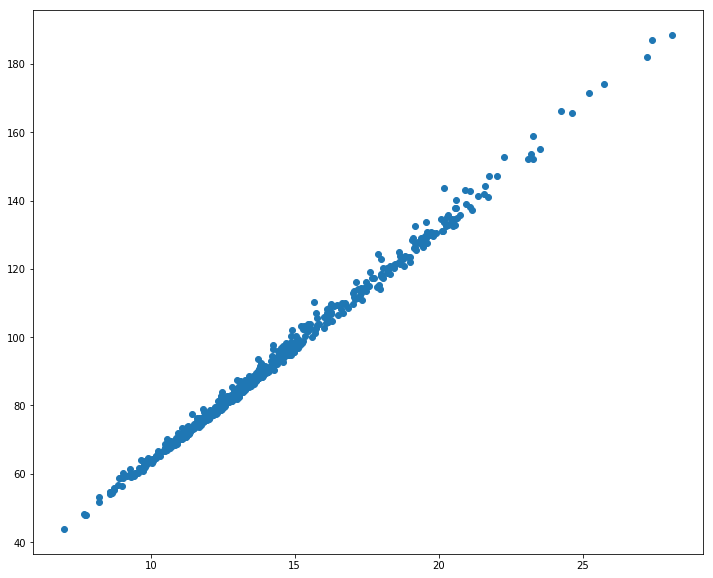

In [181]:
# 2D plot
scatter(firstMean['radius_mean'], firstMean['perimeter_mean'])
#linear relation (p=2pir)

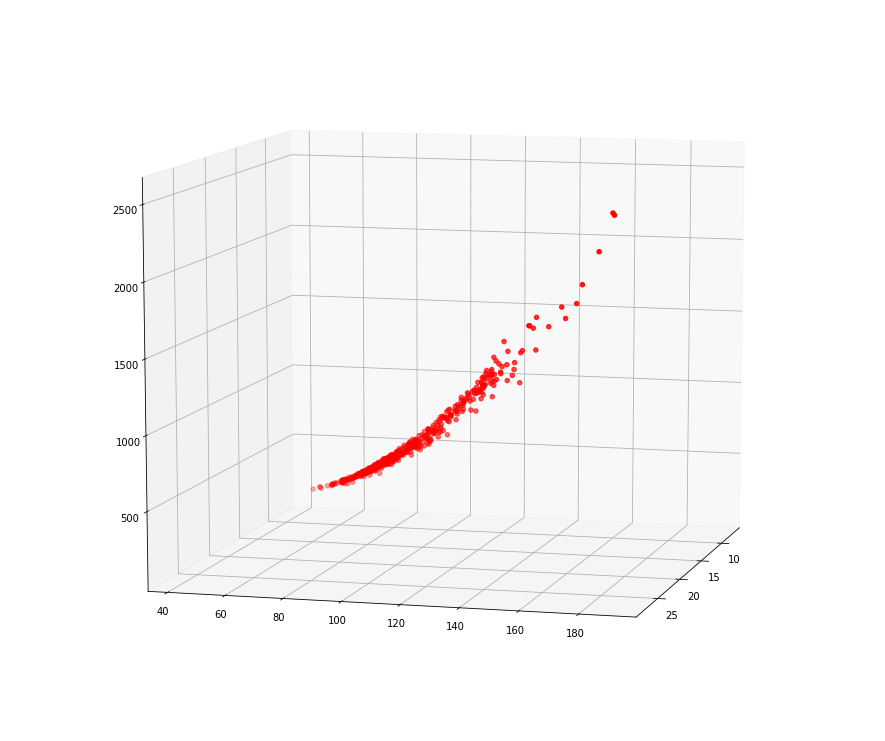

In [182]:
# 3d plot of 'radius_mean', 'perimeter_mean', 'area_mean' values to show strong relationship
import mpl_toolkits.mplot3d as m3d
fig3d = m3d.Axes3D(plt.figure())
fig3d.scatter3D(firstMean['radius_mean'], firstMean['perimeter_mean'], firstMean['area_mean'], color='red')
# rotate the graph
fig3d.view_init(10, 15)
plt.show()

***Finding: Since there is a direct and strong realtionship between the 3 parameters (radius, area and parameter), going forward we will only use one of those values for evaluation. Since radius is the common factor that is used to calculate area and parameter, we will be using it.***

Text(0.5,0,'fractal_dimension_mean')

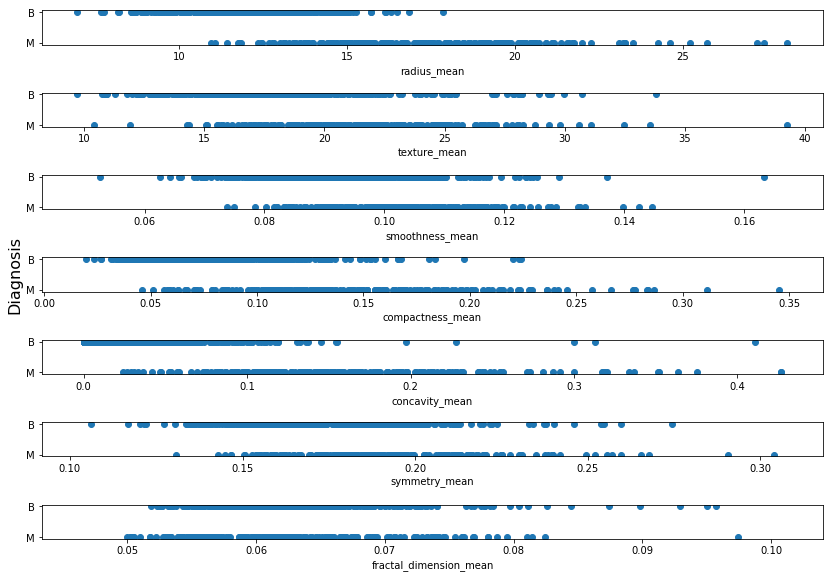

In [29]:
# classification - outcome vs the different means.
import matplotlib.gridspec as gridspec

fig = plt.figure()
# set up subplot grid; how many rows and columns
gridspec.GridSpec(16,1)

plt.subplot2grid((16, 1), (0,0))  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
scatter(bc_data['radius_mean'],bc_data['diagnosis']); # increased radius = more diagnosis 
plt.xlabel('radius_mean', size=10)

plt.subplot2grid((16,1), (2,0))
scatter(bc_data.texture_mean,bc_data['diagnosis']); # more overlap than radius_mean - not as a strong of a relationship
plt.xlabel('texture_mean', size=10)

plt.subplot2grid((16,1), (4,0))
scatter(bc_data.smoothness_mean,bc_data['diagnosis']);
# a lot of overlap, relationship not as strong
plt.xlabel('smoothness_mean', size=10)

plt.subplot2grid((16,1), (6,0))
scatter(bc_data.compactness_mean,bc_data['diagnosis']);
plt.xlabel('compactness_mean', size=10)
plt.ylabel('Diagnosis', size=16)
# some overlap, not as strong 

plt.subplot2grid((16,1), (8,0))
scatter(bc_data.concavity_mean,bc_data['diagnosis']);
plt.xlabel('concavity_mean', size=10)
# greater concavity_mean = more diagnosis of cancer

plt.subplot2grid((16,1), (10,0))
scatter(bc_data.symmetry_mean,bc_data['diagnosis']);
plt.xlabel('symmetry_mean', size=10)
# lots of overlap

plt.subplot2grid((16,1), (12,0))
scatter(bc_data.fractal_dimension_mean,bc_data['diagnosis']);
plt.xlabel('fractal_dimension_mean', size=10)
# lots of overlap


**Finding: Information above shows that symmetry, texture, fractal_dimension_mean  do not have a strong relationship and have much more overlap compared to radius_mean, area_mean, parameter_mean, compactness_mean and concavity**

In [31]:
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection


In [32]:
from scipy import stats, special

In [6]:
#Regression for Radius Mean and Diagnosis
logreg = linear_model.LogisticRegression(solver='newton-cg')
X = bc_data['radius_mean'].values.reshape(-1,1)
Y = bc_data['diagnosis']
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

1.02479287075
-15.1214328696


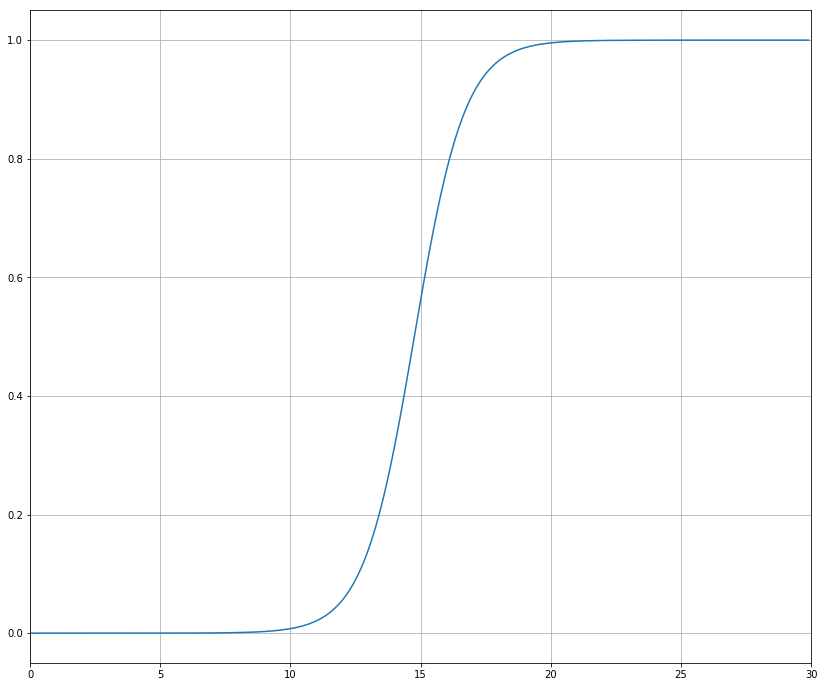

In [33]:
x = np.arange(0,30,0.1)
a = logreg.coef_[0][0]
radius_mean_diagnosis_slope = logreg.coef_[0][0]
print(a)
b = logreg.intercept_[0]
radius_mean_diagnosis_intercept = logreg.intercept_[0]
print(b)
plt.plot(x,special.expit(a*x+b))
plt.grid()
plt.xlim(0,30);

In [ ]:
#This shows relation b/w radius_mean and diagnosis , now increasing more variables to predict better.
#We will use classification technique 
#Lets start with multiple feature logistic regression model to predict type of cancer.

** Finding: the data above shows correlation between 2 sets of 3 variables (first mean and second mean) **

In [71]:
bc_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# before modeling, split data to train and test
from sklearn import feature_selection, tree
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

use, validate = model_selection.train_test_split(bc_data)
# data to save for evaluation
print(validate.shape)
validate.to_csv('validation_data.csv')
# data for model training and testing 
train, test = model_selection.train_test_split(use)
train.to_csv('train_data.csv')
test.to_csv('test_data.csv')
print(train.shape)
print(test.shape)

(143, 33)
(319, 33)
(107, 33)


In [40]:
# mapping the two types of diagnosis to 1 and 0 (true and false)

train['diagnosis'] = train['diagnosis'].map({'M': 1, 'B': 0})

train.head(2)

/Users/pankhurijain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
325,89511502,0,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,...,21.10,88.7,574.4,0.1384,0.1212,0.1020,0.05602,0.2688,0.06888,NaN
330,896839,1,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,...,21.98,124.3,1070.0,0.1435,0.4478,0.4956,0.19810,0.3019,0.09124,NaN


/Users/pankhurijain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


<Figure size 1008x864 with 0 Axes>

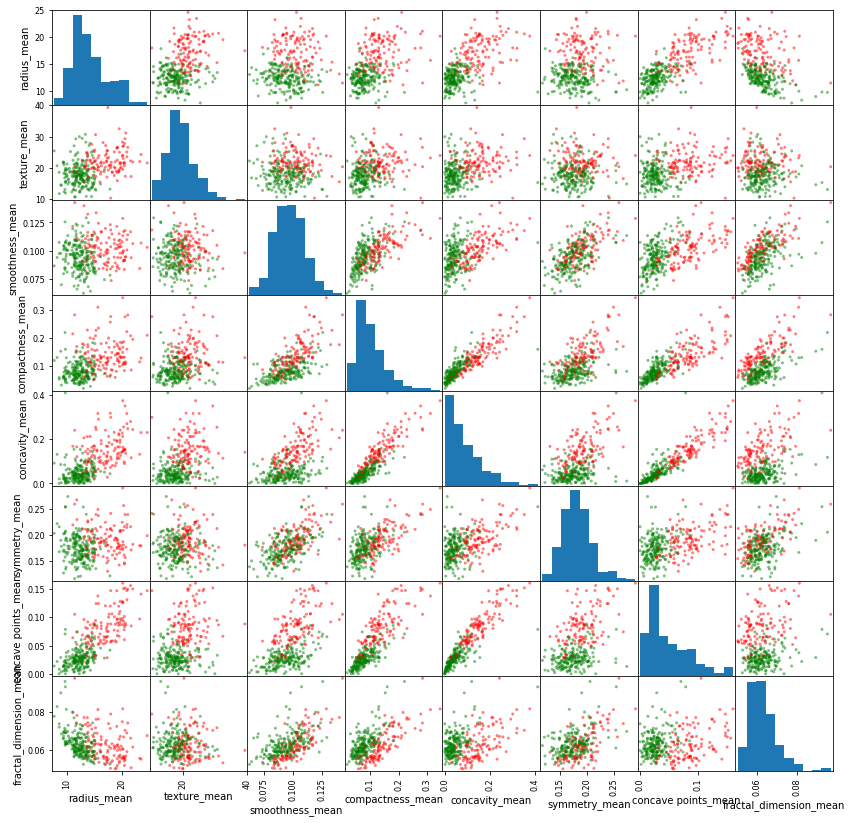

In [214]:
# going forward only use train
# come up with a hypothesis only take one of ['compactness_mean', 'concavity_mean', 'concave points_mean'] and ['radius_mean', 'perimeter_mean', 'area_mean']
# since we already saw that they are highly correlated 
fig = plt.figure()
test_var = ['radius_mean', 'texture_mean','smoothness_mean','compactness_mean', 'concavity_mean', 
            'symmetry_mean', 'concave points_mean','fractal_dimension_mean']
colour_function = {0: "green", 1: "red"}
colors = train["diagnosis"].map(lambda x: colour_function.get(x))
pd.scatter_matrix(train[test_var], c=colors, alpha = 0.5, figsize = (14, 14));
# pca or voronoi tesselation to look at the differences in distribution;
# look at the correlatin between 0 and 1 for each parameter to actually see if curve is different; 
fig.autofmt_xdate()
plt.show();

/Users/pankhurijain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


<Figure size 1008x864 with 0 Axes>

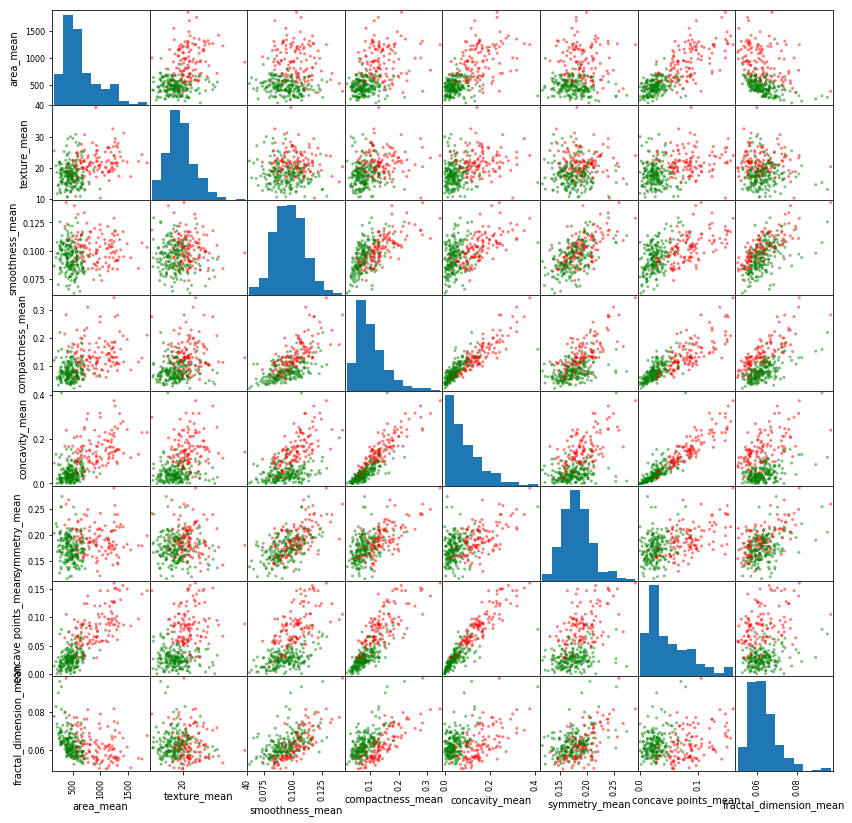

In [303]:
# going forward only use train
# come up with a hypothesis only take one of ['compactness_mean', 'concavity_mean', 'concave points_mean'] and ['radius_mean', 'perimeter_mean', 'area_mean']
# since we already saw that they are highly correlated 
fig = plt.figure()
test_var = ['area_mean', 'texture_mean','smoothness_mean','compactness_mean', 'concavity_mean', 
            'symmetry_mean', 'concave points_mean','fractal_dimension_mean']
colour_function = {0: "green", 1: "red"}
colors = train["diagnosis"].map(lambda x: colour_function.get(x))
pd.scatter_matrix(train[test_var], c=colors, alpha = 0.5, figsize = (14, 14));
# pca or voronoi tesselation to look at the differences in distribution;
# look at the correlatin between 0 and 1 for each parameter to actually see if curve is different; 
fig.autofmt_xdate()
plt.show();

** Choosing Features for Modelling :

1. We try to choose minimun features possible , to keep model simple , and to avoid overfitting 
2. Keeping only 1 of the set of features which are highly correlated (radius, compactness)
3.Discarding feature which shows close zero separation between two planes,i.e most overlapping data (fractal_dimension) **

** area_mean and compactness_mean/concavity_mean show a linear trend whereas texture_mean, smoothness_mean and symmentry_mean show less linear treand and have a lot of overlap validating what was seen in the earlier scatter plots **




In [35]:
def IQR_outliers(series):
    iqr15 = 1.5*(series.quantile(.75) - series.quantile(.25))
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    return list(series[(series < q1 - iqr15) | (series > q3 + iqr15)])

In [36]:
first = train['radius_mean'].quantile(0.25)
second = train['radius_mean'].quantile(0.5)
third = train['radius_mean'].quantile(0.75)
IQR = third - first
iqr15 = IQR * 1.5
print(first, second, third)
print(IQR)
print(iqr15)
IQR_outliers(train['radius_mean'])

11.780000000000001 13.47 15.8
4.02
6.029999999999999


[24.63, 23.27, 22.01, 23.51]

In [38]:
first = train['area_mean'].quantile(0.25)
second = train['area_mean'].quantile(0.5)
third = train['area_mean'].quantile(0.75)
IQR = third - first
iqr15 = IQR * 1.5
print(first, second, third)
print(IQR)
print(iqr15)
IQR_outliers(train['area_mean'])

427.95 561.0 787.95
360.00000000000006
540.0000000000001


[1407.0,
 1546.0,
 1841.0,
 1347.0,
 1686.0,
 1364.0,
 1482.0,
 1335.0,
 1747.0,
 1419.0]

In [202]:
#Defining a function to check accuracy score of each model
def accuracy_score(test_var,model,output_var):
    # We use the model to predict the test_encoded data
    test_pred_class = model.predict(test_var)
    return metrics.accuracy_score(output_var, test_pred_class)

**HYPOTHESIS I**

as radius_mean and compactness_mean increase, the greater chance of getting a malignant diagnosis

In [229]:

lgrg = linear_model.LogisticRegression(solver='newton-cg')
X = train[['radius_mean','compactness_mean']]
Y = train['diagnosis']
lgrg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [228]:
prediction_var = ['radius_mean','compactness_mean']
test1 = testing[prediction_var]

In [44]:
radius_compactness_coeff = lgrg.coef_[0][0]

print(radius_compactness_coeff )

0.985772974779


In [45]:
b1,b2 = lgrg.coef_[0]
b0 = lgrg.intercept_[0]
print(b1)
print(b2)
print(b0)

0.985772974779
1.6355500642
-14.7855188209


Set of data for Testing

In [51]:
testing = pd.read_csv('test_data.csv', low_memory=False)
testing.head(2)

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,174,871642,B,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,...,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164,NaN
1,235,88249602,B,14.03,21.25,89.79,603.4,0.09070,0.06945,0.01462,...,30.28,98.27,715.5,0.1287,0.15130,0.06231,0.07963,0.2226,0.07617,NaN


In [61]:
testing[testing['diagnosis'] == 'M'].head(2)

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
6,499,91485,M,20.59,21.24,137.8,1320.0,0.1085,0.1644,0.2188,...,30.76,163.2,1760.0,0.1464,0.3597,0.5179,0.2113,0.2480,0.08999,NaN
10,535,919555,M,20.55,20.86,137.8,1308.0,0.1046,0.1739,0.2085,...,25.48,160.2,1809.0,0.1268,0.3135,0.4433,0.2148,0.3077,0.07569,NaN


In [56]:
def diagnosis_model(radius,compactness): #building model
    return special.expit(radius*b1+compactness*b2+b0)

So if, say, a patient had a nuclie detected of radius mean of 14.03 and compactness mean of 0.6945, what does our model predict?
#0 means B and 1 means M

In [52]:
lgrg.predict([[14.03,0.06945]])[0]

0

The prediction is that patient has , and we can determine the probability of this cancer type:

In [57]:
diagnosis_model(14.03,0.06945)

0.30121158687817901

In [62]:
lgrg.predict([[20.59,0.1644]])[0]

1

In [230]:
#accuracy score
test_pred_class = lgrg.predict(test1)
print(metrics.accuracy_score(testing['diagnosis'], test_pred_class))

0.897196261682


In [231]:
X = train[['radius_mean','compactness_mean']]
Y = train['diagnosis']
gnb = GaussianNB()
gnb.fit(X,Y)
test_pred_class = gnb.predict(test1)
print(metrics.accuracy_score(testing['diagnosis'], test_pred_class))

0.915887850467



### HYPOTHESIS II
** as radius_mean, compactness_mean, texture_mean,smoothness_mean and symmetry_mean increase, the greater chance of getting a malignant diagnosis ** 

In [233]:
prediction_var = ['radius_mean', 'texture_mean','smoothness_mean','compactness_mean','symmetry_mean']
X = train[prediction_var]
Y = train['diagnosis']

1. Apply Logistic Regression
2. apply Decision Tree
3. Determine accuracy score
4. Check cross Validation

In [64]:
lgrg = linear_model.LogisticRegression(solver='newton-cg')
X = train[prediction_var]
Y = train['diagnosis']
lgrg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
#defining variable for each feature in Training set
x = train['radius_mean']
y = train['texture_mean']
u = train['smoothness_mean']
v = train['compactness_mean']
w = train['symmetry_mean']
z = train['diagnosis']

In [88]:
#defining variable for each feature in Testing set
xt = testing['radius_mean']
yt = testing['texture_mean']
ut = testing['smoothness_mean']
vt = testing['compactness_mean']
wt = testing['symmetry_mean']
zt = testing['diagnosis']

In [65]:
b1,b2,b3,b4,b5 = lgrg.coef_[0]
b0 = lgrg.intercept_[0]

In [66]:
def diagnosis_model_logistic(radius,texture,smothness,compactness,symmtery): #building 2nd model
    return special.expit(radius*b1+ texture*b2+ smothness*b3+ compactness*b4 + symmtery*b5 + b0)

*** How our model is performing ****

In [ ]:
testing.set_index('id', inplace = True)
testing = testing.dropna(axis=1,how='all')


In [77]:
testing.loc[testing['diagnosis'] == 'B',['radius_mean', 'texture_mean',
                                          'smoothness_mean','compactness_mean','symmetry_mean']].head(2)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean
id,,,,,
871642,10.66,15.15,0.08792,0.04302,0.1928
88249602,14.03,21.25,0.09070,0.06945,0.1517


In [80]:
test1 = testing[prediction_var]

In [81]:
testing['diagnosis'] = testing['diagnosis'].map({'M': 1, 'B': 0})

In [76]:
lgrg.predict([[20.59,21.24,0.1085,0.1644,0.1848]])[0]

1

In [78]:
lgrg.predict([[10.66,15.15,0.08792,0.04302,0.1928]])[0]

0

In [83]:
# We use the model to predict the test_encoded data
test_pred_class = lgrg.predict(test1)

In [84]:
print(metrics.accuracy_score(testing['diagnosis'], test_pred_class))

0.943925233645


So the prediction accuracy of our model was  ≅94.3%
≅
94.39
%
 , which is fairly high

In [86]:
#Meaure of model on actual Training set
print('R-squared value is', metrics.r2_score(z, special.expit(x*b1+ y*b2+ u*b3+ v*b4 + w*b5 + b0)))
print('MAE is', metrics.mean_absolute_error(z,special.expit(x*b1+ y*b2+ u*b3+ v*b4 + w*b5 + b0)))
#print('Mean and std are', df['Data'].mean(), df['Data'].std())

R-squared value is 0.668217268673
MAE is 0.158491427069


In [89]:
#Compare the measure of model to test data set
print('R-squared value is', metrics.r2_score(zt, special.expit(xt*b1+ yt*b2+ ut*b3+ vt*b4 + wt*b5 + b0)))
print('MAE is', metrics.mean_absolute_error(zt,special.expit(xt*b1+ yt*b2+ ut*b3+ vt*b4 + wt*b5 + b0)))

R-squared value is 0.761184567881
MAE is 0.136372366202


Both the measures improved on the test data, as $R^2$ got closer to  1 , and the MAE reduced in size. These are good signs for our model.

DECISION TREE MODEL

In [90]:
from sklearn import tree

In [91]:
cancer = tree.DecisionTreeClassifier()
cancer

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
train.diagnosis.unique() #lists all levels in category
#0:B 1:M

array([0, 1])

In [93]:
# Fit the model
cancer.fit(train[prediction_var], train['diagnosis'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
#'radius_mean', 'texture_mean','smoothness_mean','compactness_mean','symmetry_mean'
cancer.predict([[20.59,21.24,0.1085,0.1644,0.1848]])

array([1])

In [95]:
cancer.predict([[10.66,15.15,0.08792,0.04302,0.1928]])

array([0])

In [98]:
accuracy_score(testing[prediction_var],cancer,testing['diagnosis'])

0.93457943925233644

TREE VISUALIZATION

In [99]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# On Windows, Graphviz no longer adds itself to the PATH in Windows.  
# This code accomplishes it (temporarily)
import os

In [103]:
train.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

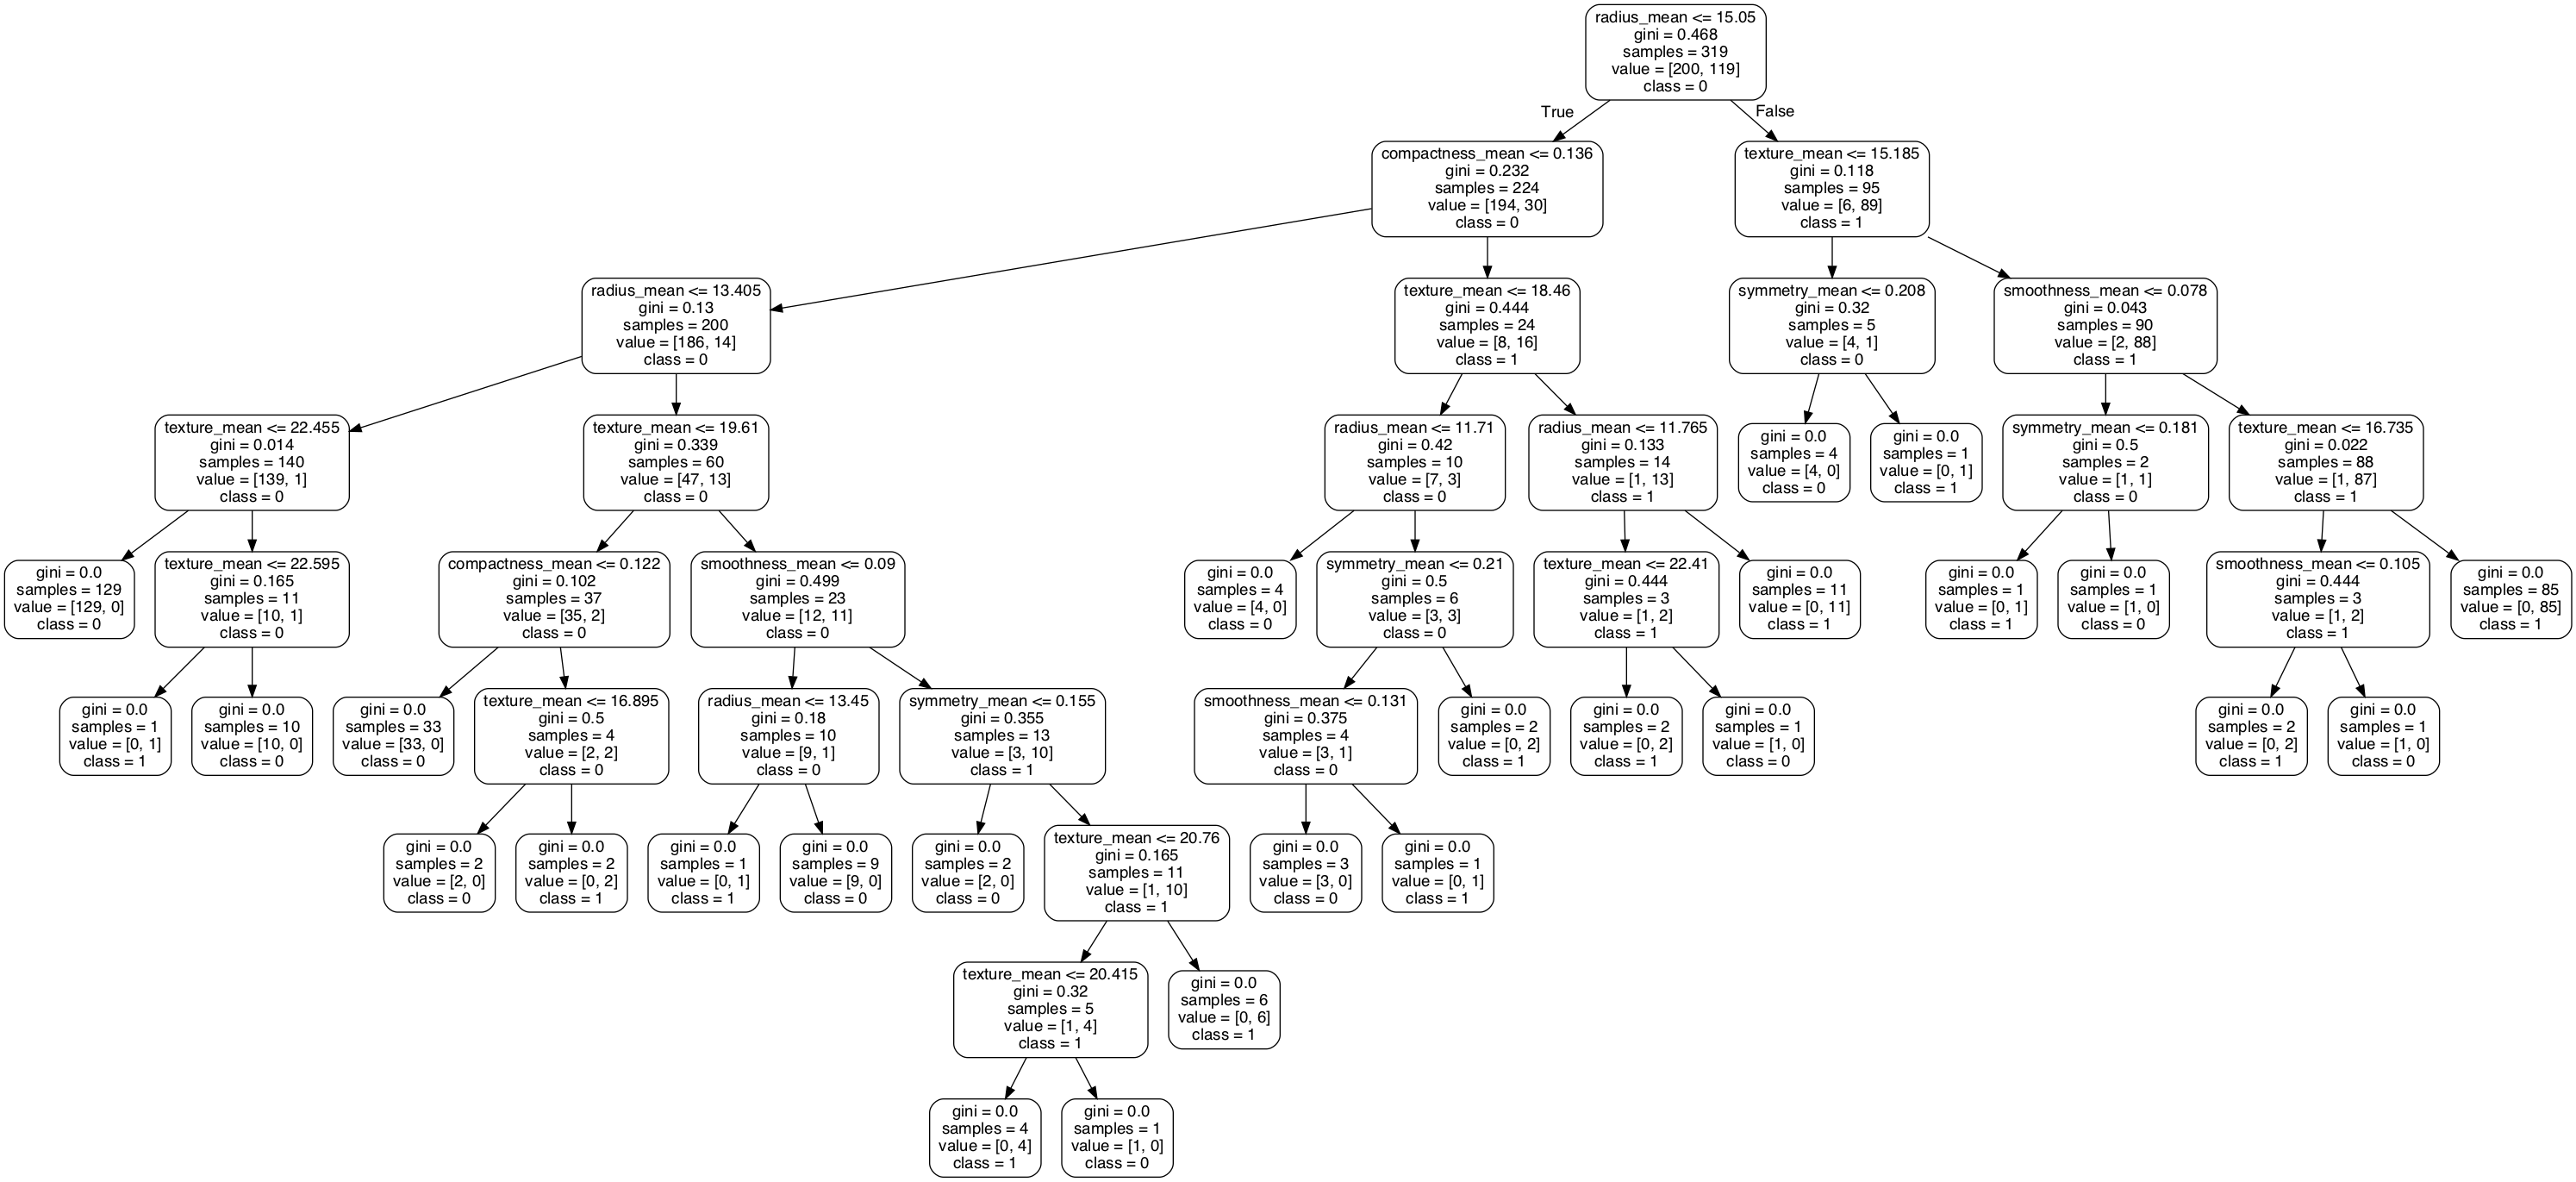

In [107]:
dot_data = StringIO()
export_graphviz(cancer, out_file=dot_data, feature_names=train[prediction_var].columns, class_names= ['0','1'], 
                filled=False, rounded=True, special_characters=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

GAUSSIAN NAIVE 

In [234]:
gnb = GaussianNB()
gnb.fit(X,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.94392523364485981

** HYPOTHESIS III ** 

AS radius mean and concavity mean increase, the greater chance of getting a malignant diagnosis

In [198]:
X = train[['radius_mean','concavity_mean']]
Y = train['diagnosis']


In [199]:
# Fit the new decision tree model
cancer.fit(X, Y)
accuracy_score(testing[['radius_mean','concavity_mean']],cancer,testing['diagnosis'])

0.87850467289719625

RANDOM FOREST

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
# Fit the random forest model
clf = RandomForestClassifier(n_estimators=15,min_samples_split=2)
clf.fit(X, Y)
accuracy_score(testing[['radius_mean','concavity_mean']],clf,testing['diagnosis'])

0.92523364485981308

GaussianNB

In [194]:
gnb = GaussianNB()
gnb.fit(X,Y)
accuracy_score(testing[['radius_mean','concavity_mean']],gnb,testing['diagnosis'])

0.93457943925233644

LOGISTIC REGRESSION

In [201]:
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(X,Y)
accuracy_score(testing[['radius_mean','concavity_mean']],lgrg,testing['diagnosis'])

0.90654205607476634

**Using Other Methods to Validate the model we choose**

In [160]:
test_pred = lgrg.predict(testing[prediction_var])

In [162]:
test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [164]:
metrics.confusion_matrix(testing['diagnosis'],test_pred)

array([[68,  2],
       [ 3, 34]])

cm

In [ ]:
Rsquare =

In [174]:
train.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**HYPOTHESIS IV**

AS radius mean , texture_mean, smoothness_mean, symmetry_mean and concavity mean increase, the greater chance of getting a malignant diagnosis

Trying with different Variables to see which to keep and which to discard. Also trying to choose minimum variables to avoid issue of over fitting.

In [177]:
#compactness_mean
#concavity_mean
prediction_var = ['radius_mean', 'texture_mean','smoothness_mean','concavity_mean','symmetry_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean
325,12.67,17.30,0.10280,0.03193,0.1707
330,16.03,15.51,0.09491,0.12040,0.1782


In [178]:
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

GaussianNB(priors=None)

In [179]:
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.95327102803738317

**HYPOTHESIS V **

In [181]:
#compactness_mean
#concavity_mean
prediction_var = ['radius_mean', 'texture_mean','smoothness_mean','concave points_mean','symmetry_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,radius_mean,texture_mean,smoothness_mean,concave points_mean,symmetry_mean
325,12.67,17.30,0.10280,0.02107,0.1707
330,16.03,15.51,0.09491,0.07041,0.1782


In [182]:
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.94392523364485981

**HYPOTHESIS VI **

In [190]:
#compactness_mean
#concavity_mean
prediction_var = ['radius_mean', 'concave points_mean']
Y = train['diagnosis']
X = train[prediction_var]
X.head(2)

,radius_mean,concave points_mean
325,12.67,0.02107
330,16.03,0.07041


In [185]:
gnb = GaussianNB()
gnb.fit(X,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.93457943925233644

In [191]:
#Model 2
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(X,Y)
accuracy_score(testing[prediction_var],lgrg,testing['diagnosis'])

0.87850467289719625

**HYPOTHESIS VII **

In [188]:
#compactness_mean
prediction_var = ['radius_mean', 'texture_mean','smoothness_mean','compactness_mean','symmetry_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean
325,12.67,17.30,0.10280,0.07664,0.1707
330,16.03,15.51,0.09491,0.13710,0.1782


In [187]:
#Model 1
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.94392523364485981

In [189]:
#Model 2
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(W,Y)
accuracy_score(testing[prediction_var],lgrg,testing['diagnosis'])

0.94392523364485981

**HYPOTHESIS VIII **

In [356]:
#compactness_mean
prediction_var = ['area_mean', 'texture_mean','smoothness_mean','compactness_mean','symmetry_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,area_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean
325,489.9,17.30,0.10280,0.07664,0.1707
330,793.2,15.51,0.09491,0.13710,0.1782


In [357]:
#Model 2
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(W,Y)
accuracy_score(testing[prediction_var],lgrg,testing['diagnosis'])

0.95327102803738317

In [217]:
#Model 1
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.95327102803738317

In [358]:
# Fit the random forest model
clf = RandomForestClassifier(n_estimators=15,min_samples_split=2)
clf.fit(W, Y)
accuracy_score(testing[prediction_var],clf,testing['diagnosis'])

0.94392523364485981

In [359]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = train[prediction_var].columns,columns=['importance']).sort_values('importance',ascending=False)

In [360]:
feature_importances

,importance
area_mean,0.432353
compactness_mean,0.236123
texture_mean,0.176628
smoothness_mean,0.089170
symmetry_mean,0.065726


** Symmetry Mean imporatnce is so less hence we can omit it from our model **

**HYPOTHESIS IX **

In [238]:
#compactness_mean
prediction_var = ['area_mean','compactness_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,area_mean,compactness_mean
325,489.9,0.07664
330,793.2,0.13710


In [219]:
#Model 1
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.92523364485981308

In [239]:
#Model 2
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(W,Y)
accuracy_score(testing[prediction_var],lgrg,testing['diagnosis'])

0.89719626168224298

In [225]:
# Fit the random forest model
clf = RandomForestClassifier(n_estimators=15,min_samples_split=2)
clf.fit(W, Y)
accuracy_score(testing[prediction_var],clf,testing['diagnosis'])

0.91588785046728971

**HYPOTHESIS X **

In [241]:
#compactness_mean
prediction_var = ['area_mean', 'texture_mean','smoothness_mean','concavity_mean','symmetry_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,area_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean
325,489.9,17.30,0.10280,0.03193,0.1707
330,793.2,15.51,0.09491,0.12040,0.1782


In [236]:
#Model 1
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.96261682242990654

In [237]:
#Model 2
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(W,Y)
accuracy_score(testing[prediction_var],lgrg,testing['diagnosis'])

0.95327102803738317

In [242]:
# Fit the random forest model
clf = RandomForestClassifier(n_estimators=15,min_samples_split=2)
clf.fit(W, Y)
accuracy_score(testing[prediction_var],clf,testing['diagnosis'])

0.94392523364485981

In [243]:
#Fit the model Decision Tree
cancer = tree.DecisionTreeClassifier()
cancer.fit(W, Y)
accuracy_score(testing[prediction_var],cancer,testing['diagnosis'])

0.92523364485981308

**HYPOTHESIS XI **

In [280]:
prediction_var = ['area_mean', 'texture_mean','smoothness_mean','concavity_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,area_mean,texture_mean,smoothness_mean,concavity_mean
325,489.9,17.30,0.10280,0.03193
330,793.2,15.51,0.09491,0.12040


In [281]:
#Model 1
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.96261682242990654

In [249]:
#Fit the model Decision Tree
cancer = tree.DecisionTreeClassifier()
cancer.fit(W, Y)
accuracy_score(testing[prediction_var],cancer,testing['diagnosis'])

0.92523364485981308

In [250]:
# Fit the random forest model
clf = RandomForestClassifier(n_estimators=15,min_samples_split=2)
clf.fit(W, Y)
accuracy_score(testing[prediction_var],clf,testing['diagnosis'])

0.96261682242990654

In [251]:
#Model 2
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(W,Y)
accuracy_score(testing[prediction_var],lgrg,testing['diagnosis'])

0.95327102803738317

**HYPOTHESIS XII **

In [252]:
prediction_var = ['area_mean', 'texture_mean','concavity_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,area_mean,texture_mean,concavity_mean
325,489.9,17.30,0.03193
330,793.2,15.51,0.12040


In [253]:
#Model 1
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.94392523364485981

In [254]:
# Fit the random forest model
clf = RandomForestClassifier(n_estimators=15,min_samples_split=2)
clf.fit(W, Y)
accuracy_score(testing[prediction_var],clf,testing['diagnosis'])

0.93457943925233644

In [255]:
#Model 2
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(W,Y)
accuracy_score(testing[prediction_var],lgrg,testing['diagnosis'])

0.95327102803738317

**HYPOTHESIS XIII **

In [256]:
prediction_var = ['area_mean', 'smoothness_mean','concavity_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,area_mean,smoothness_mean,concavity_mean
325,489.9,0.10280,0.03193
330,793.2,0.09491,0.12040


In [257]:
#Model 1
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.93457943925233644

In [258]:
# Fit the random forest model
clf = RandomForestClassifier(n_estimators=15,min_samples_split=2)
clf.fit(W, Y)
accuracy_score(testing[prediction_var],clf,testing['diagnosis'])

0.93457943925233644

In [259]:
#Model 2
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(W,Y)
accuracy_score(testing[prediction_var],lgrg,testing['diagnosis'])

0.90654205607476634

**HYPOTHESIS XIV **

In [260]:
prediction_var = ['perimeter_mean', 'texture_mean','smoothness_mean','concavity_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,perimeter_mean,texture_mean,smoothness_mean,concavity_mean
325,81.25,17.30,0.10280,0.03193
330,105.80,15.51,0.09491,0.12040


In [261]:
#Model 1
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.96261682242990654

In [262]:
# Fit the random forest model
clf = RandomForestClassifier(n_estimators=15,min_samples_split=2)
clf.fit(W, Y)
accuracy_score(testing[prediction_var],clf,testing['diagnosis'])

0.93457943925233644

In [263]:
#Model 2
lgrg = linear_model.LogisticRegression(solver='newton-cg')
lgrg.fit(W,Y)
accuracy_score(testing[prediction_var],lgrg,testing['diagnosis'])

0.95327102803738317

**FINAL HYPOTHESIS **

AS area mean , texture mean, smoothness_mean and concavity mean increases, the greater chance of getting a malignant diagnosis

Creating Model Using Gaussian Naive Bayes and Random Forest as they give highest accuracy score

In [392]:
prediction_var = ['area_mean', 'texture_mean','smoothness_mean','concavity_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)


,area_mean,texture_mean,smoothness_mean,concavity_mean
325,489.9,17.30,0.10280,0.03193
330,793.2,15.51,0.09491,0.12040


In [305]:
fnb = BernoulliNB()
fnb.fit(W,Y)
accuracy_score(testing[prediction_var],fnb,testing['diagnosis'])

0.65420560747663548

*Gaussian Naive Bayes*

In [364]:
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.96261682242990654

####
**CREATING FUNCTION**
**GAUSSIAN NAIVE PROBABLITY MODEL**

In [267]:
#defining variable for each feature in Training set
x = train[['area_mean', 'texture_mean','smoothness_mean','concavity_mean']]
z = train['diagnosis']

In [268]:
#defining variable for each feature in Testing set
xt = testing[['area_mean', 'texture_mean','smoothness_mean','concavity_mean']]
zt = testing['diagnosis']

In [371]:
def predict_model_gaussian(area,texture,smothness,concavity): #building final model
    return gnb.predict([[area,texture,smothness,concavity]])# We feed it numbers as a list of a list, owing to its expectation of the format of the input.

In [372]:
predict_model_gaussian(489.9,17.30,0.10280,0.03193)

array([0])

In [390]:
def diagnosis_model_gaussian_prob(area,texture,smothness,concavity): #building final probablity model
    return gnb.predict_proba([[area,texture,smothness,concavity]])

In [391]:
diagnosis_model_gaussian_prob(489.9,17.30,0.10280,0.03193)

array([[ 0.99364355,  0.00635645]])

Its is predicted from using this model and with given inupt , probability of Benign is 0.99 and probability of Malignant is 0.0063

In [393]:
diagnosis_model_gaussian_prob(793.2,15.51,0.09491,0.12040)

array([[ 0.27535807,  0.72464193]])

Its is predicted from using this model and with given inupt , probability of Benign is 0.27 and probability of Malignant is 0.72

In [394]:
predict_model_gaussian(793.2,15.51,0.09491,0.12040)

array([1])

**HOW MODEL IS PERFORMING USING $R^2$ and MAE**

In [273]:
#Meaure of model on actual Training set
print('R-squared value is', metrics.r2_score(z, gnb.predict(x)))
print('MAE is', metrics.mean_absolute_error(z,gnb.predict(x)))

R-squared value is 0.70512605042
MAE is 0.0689655172414


The combination of the fairly high $R^2$, fairly low MAE on the scale of the data set, improvement of values from training to test, and a visual inspection of the model's graph show us that this model likely fits the data fairly well. 

In [274]:
#Compare the measure of model to test data set
print('R-squared value is', metrics.r2_score(zt, gnb.predict(xt)))
print('MAE is', metrics.mean_absolute_error(zt,gnb.predict(xt)))

R-squared value is 0.834749034749
MAE is 0.0373831775701


Both the measures improved on the test data, as $R^2$ got closer to  1 , and the MAE reduced in size. These are good signs for our model.

**Graph between variables in FINAL HYPOTHESIS**

/Users/pankhurijain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


<Figure size 1008x864 with 0 Axes>

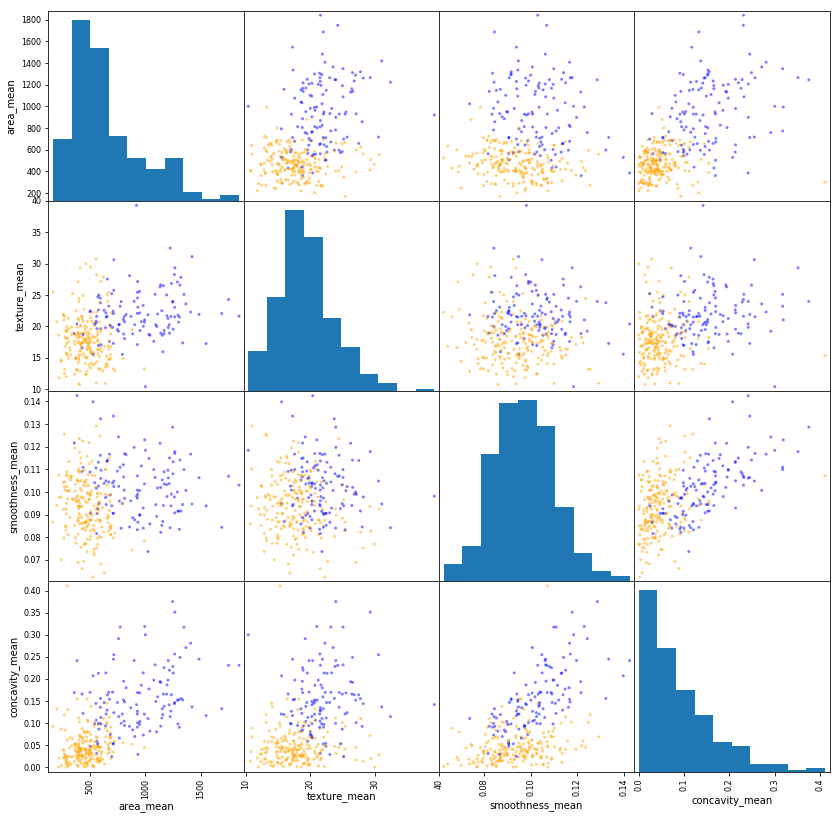

In [362]:
# going forward only use train
# come up with a hypothesis only take one of ['texture_mean', 'concavity_mean', 'smoothness_mean', 'area_mean']
# since we already saw that they are highly correlated 
fig = plt.figure()
test_var = ['area_mean', 'texture_mean','smoothness_mean', 'concavity_mean']
colour_function = {0: "orange", 1: "blue"}
colors = train["diagnosis"].map(lambda x: colour_function.get(x))
pd.scatter_matrix(train[test_var], c=colors, alpha = 0.5, figsize = (14, 14));

**USING CONFUSION MATRIX TO VALIDATE GAUSSIAN MODEL **

In [299]:
test_pred = gnb.predict(testing[prediction_var])
cm = metrics.confusion_matrix(testing['diagnosis'],test_pred)

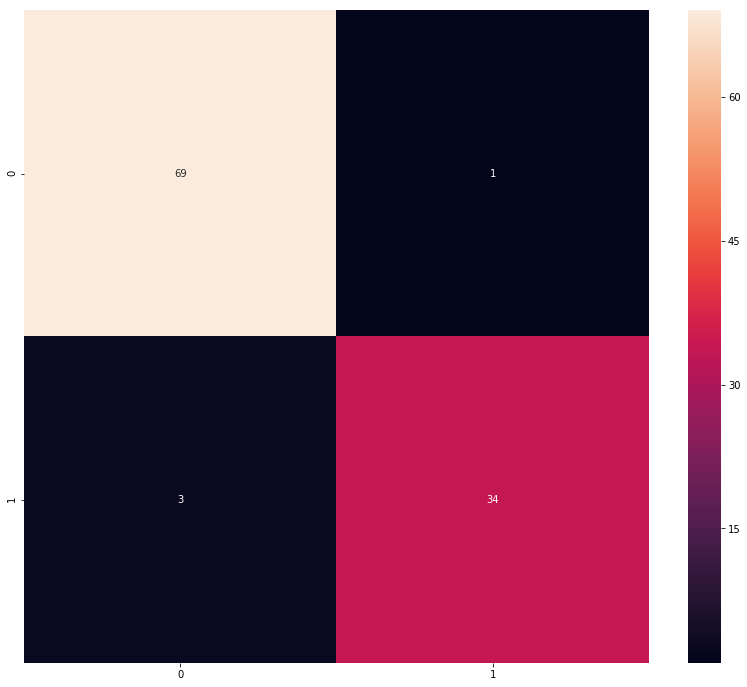

In [302]:
sns.heatmap(cm, annot=True)

###RANDOM FOREST MODEL

In [295]:
# Fit the random forest model
clf = RandomForestClassifier(n_estimators=20,min_samples_split=2)
clf.fit(W, Y)
accuracy_score(testing[prediction_var],clf,testing['diagnosis'])

0.96261682242990654

**USING CONFUSION MATRIX TO VALIDATE RANDOM FOREST MODEL**

In [292]:
test_pred = clf.predict(testing[prediction_var])
metrics.confusion_matrix(testing['diagnosis'],test_pred)

array([[69,  1],
       [ 4, 33]])

**TREE VISUALIZATION OF RANDOM FOREST**

In [278]:
train[prediction_var].columns

Index(['area_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean'], dtype='object')

In [296]:
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=2024903808, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1341921770, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_we

In [297]:
y = clf.estimators_[0]
y

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2024903808, splitter='best')

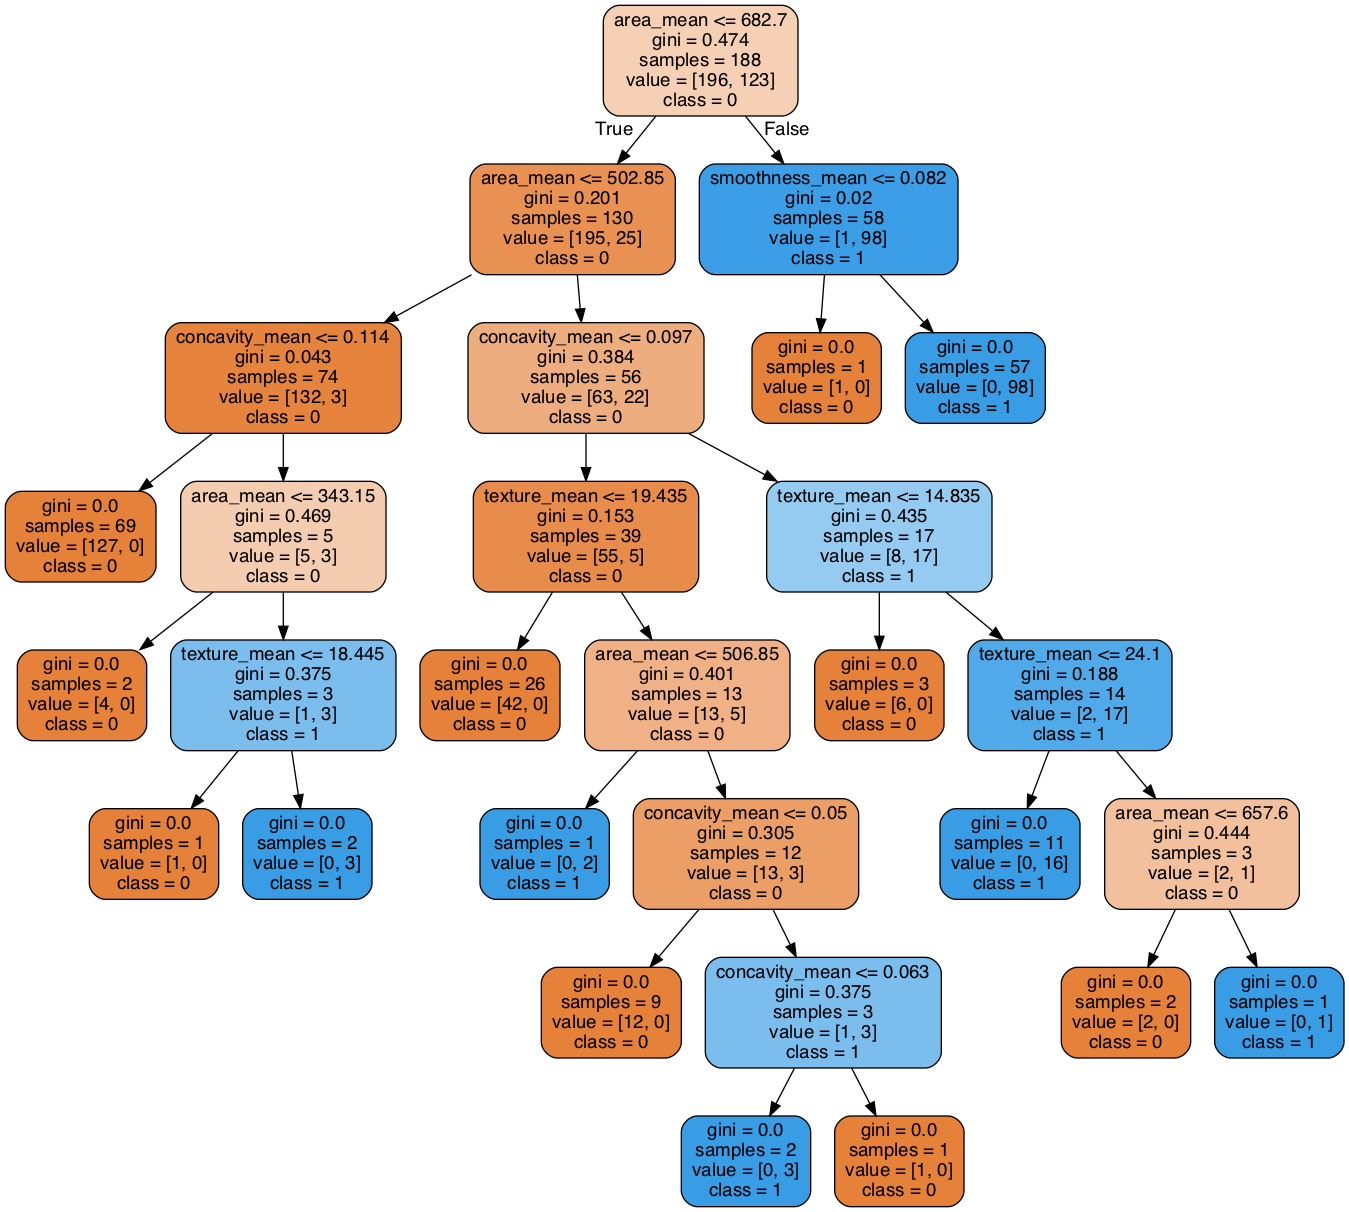

In [298]:
#visualize each random forest
export_graphviz(y, out_file=dot_data, feature_names=train[prediction_var].columns, class_names= ['0','1'], 
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [354]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = train[prediction_var].columns,columns=['importance']).sort_values('importance',ascending=False)

In [355]:
feature_importances

,importance
area_mean,0.439847
concavity_mean,0.371093
texture_mean,0.119131
smoothness_mean,0.069928


**VISUALIZATION AREA VS TEXTURE**

In [334]:
prediction_var = ['area_mean', 'texture_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,area_mean,texture_mean
325,489.9,17.30
330,793.2,15.51


In [335]:
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.93457943925233644

In [338]:
xlim = train['area_mean'].sort_values(ascending=True)

In [339]:
ylim = train['texture_mean'].sort_values(ascending=True)

In [340]:
xx, yy = np.meshgrid(xlim,ylim)

In [341]:
Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])
# predict the classification probabilities on a grid


In [342]:
Z = Z[:,1].reshape(xx.shape)

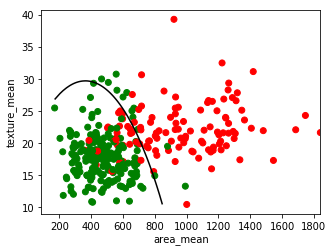

In [331]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
colour_function = {0: "green", 1: "red"}
colors = train["diagnosis"].map(lambda x: colour_function.get(x))
ax.scatter(train['area_mean'], train['texture_mean'], c=colors, cmap=plt.cm.binary, zorder=2)

ax.contour(xx, yy, Z, [0.5], colors='k')

#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

ax.set_xlabel('area_mean')
ax.set_ylabel('texture_mean')

plt.show()

In [343]:
prediction_var = ['area_mean', 'concavity_mean']
Y = train['diagnosis']
W = train[prediction_var]
W.head(2)

,area_mean,concavity_mean
325,489.9,0.03193
330,793.2,0.12040


In [344]:
gnb = GaussianNB()
gnb.fit(W,Y)
accuracy_score(testing[prediction_var],gnb,testing['diagnosis'])

0.93457943925233644

In [347]:
xlim = train['area_mean'].sort_values(ascending=True)
ylim = train['concavity_mean'].sort_values(ascending=True)

xx, yy = np.meshgrid(xlim,ylim)
Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,1].reshape(xx.shape)

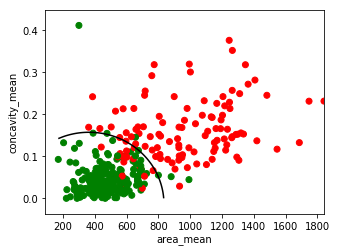

In [348]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
colour_function = {0: "green", 1: "red"}
colors = train["diagnosis"].map(lambda x: colour_function.get(x))
ax.scatter(train['area_mean'], train['concavity_mean'], c=colors, cmap=plt.cm.binary, zorder=2)

ax.contour(xx, yy, Z, [0.5], colors='k')

#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

ax.set_xlabel('area_mean')
ax.set_ylabel('concavity_mean')

plt.show()